In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

popt_marcel_keils_ba  [0.01581741 0.61075842]
popt_exp_calculator  [6.08506001e-05 9.23345744e-01]


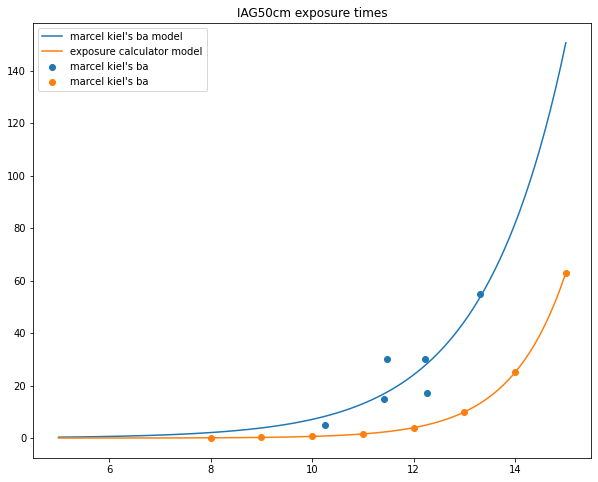

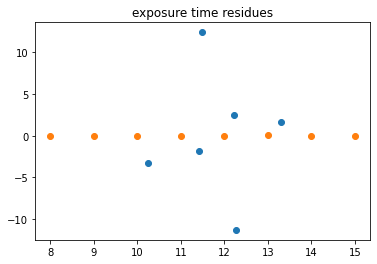

In [24]:
#iag50cm
mag_vs_exposure_from_marcel_kiels_ba = np.array(
    [
        [10.25, 5],
        [11.484, 30],
        [11.41, 15],
        [12.262, 17],
        [12.214, 30],
        [13.3, 55],
    ]
)

#http://www.astro.physik.uni-goettingen.de/~hessman/MONET/metc_all.html
# 2x2 binning, R filter, SBIG 6303, signal to noise 280 (=> peak ~20000), seeing 1
mag_vs_exposure_exp_calculator = np.array(
    [
        [8, 0.1],
        [9, 0.25],
        [10, 0.6],
        [11, 1.56],
        [12, 3.9],
        [13, 10],
        [14, 25],
        [15, 63],
    ]
)

def exp_fit(x, a, b):
    return a * np.exp(b * x)

p0 = [1e-2, 1]
popt_marcel_keils_ba, _ = optimize.curve_fit(
    exp_fit, 
    mag_vs_exposure_from_marcel_kiels_ba[:,0], 
    mag_vs_exposure_from_marcel_kiels_ba[:,1], 
    p0=p0
)
print("popt_marcel_keils_ba ", popt_marcel_keils_ba)
popt_exp_calculator, _ = optimize.curve_fit(
    exp_fit, 
    mag_vs_exposure_exp_calculator[:,0], 
    mag_vs_exposure_exp_calculator[:,1], 
    p0=p0
)
print("popt_exp_calculator ", popt_exp_calculator)

plt.figure(figsize=(10,8))
plt.title('IAG50cm exposure times')
plt.scatter(
    mag_vs_exposure_from_marcel_kiels_ba[:,0], 
    mag_vs_exposure_from_marcel_kiels_ba[:,1], 
    label="marcel kiel's ba"
)
plt.scatter(
    mag_vs_exposure_exp_calculator[:,0], 
    mag_vs_exposure_exp_calculator[:,1], 
    label="marcel kiel's ba"
)

xs = np.linspace(5,15,100)
plt.plot(xs, exp_fit(xs, *popt_marcel_keils_ba), label="marcel kiel's ba model")
plt.plot(xs, exp_fit(xs, *popt_exp_calculator), label="exposure calculator model")

plt.legend()
plt.show()

plt.figure()
plt.title('exposure time residues')
plt.scatter(
    mag_vs_exposure_from_marcel_kiels_ba[:,0], 
    mag_vs_exposure_from_marcel_kiels_ba[:,1] - exp_fit(mag_vs_exposure_from_marcel_kiels_ba[:,0], *popt_marcel_keils_ba)
)
plt.scatter(
    mag_vs_exposure_exp_calculator[:,0],
    mag_vs_exposure_exp_calculator[:,1] - exp_fit(mag_vs_exposure_exp_calculator[:,0], *popt_exp_calculator)
)
plt.show()

[6.55616647e-05 9.22083089e-01]


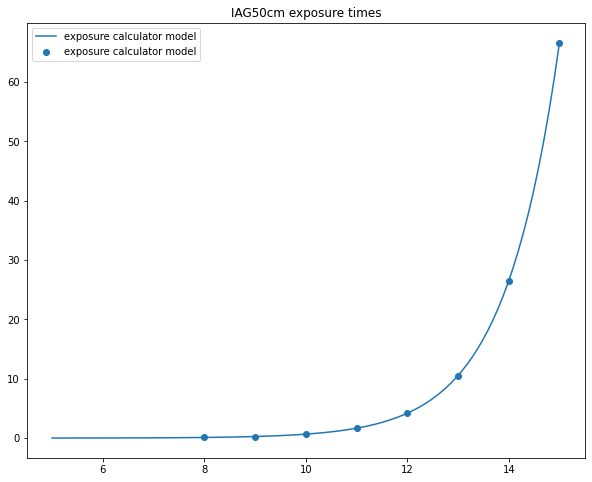

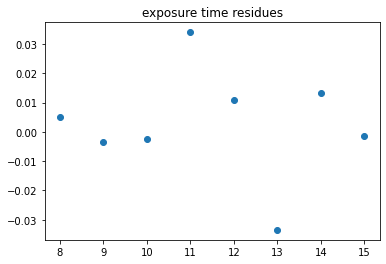

In [26]:
#MONET/S from exposure time calculator http://www.astro.physik.uni-goettingen.de/~hessman/MONET/metc_all.html
# FLI 230 camera
# 2x2 binning, R filter, signal to noise 450 (=> peak ~ 18000)
mag_vs_exposure = np.array(
    [
        [8, 0.11],
        [9, 0.26],
        [10, 0.66],
        [11, 1.7],
        [12, 4.2],
        [13, 10.5],
        [14, 26.5],
        [15, 66.6],
    ]
)

def exp_fit(x, a, b):
    return a * np.exp(b * x)

p0 = [1e-2, 1]
popt, pcov = optimize.curve_fit(exp_fit, mag_vs_exposure[:,0], mag_vs_exposure[:,1], p0=p0)
print(popt)

plt.figure(figsize=(10,8))
plt.title('IAG50cm exposure times')
plt.scatter(
    mag_vs_exposure[:,0], 
    mag_vs_exposure[:,1], 
    label="exposure calculator model"
)

xs = np.linspace(5,15,100)
plt.plot(xs, exp_fit(xs, *popt), label="exposure calculator model")

plt.legend()
plt.show()

plt.figure()
plt.title('exposure time residues')
plt.scatter(
    mag_vs_exposure[:,0],
    mag_vs_exposure[:,1] - exp_fit(mag_vs_exposure[:,0], *popt)
)
plt.show()

[7.91994716e-05 9.24167990e-01]


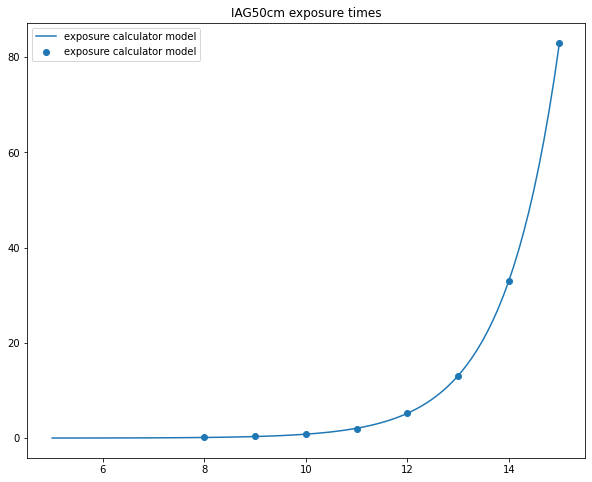

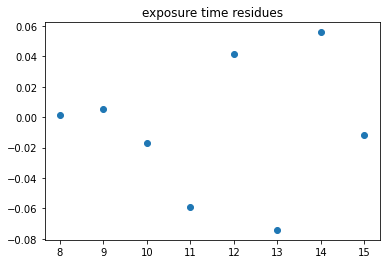

In [27]:
#MONET/N from exposure time calculator http://www.astro.physik.uni-goettingen.de/~hessman/MONET/metc_all.html
# SBIG 8300 camera
# 2x2 binning, R filter, signal to noise 450 (=> peak ~ 18000)
mag_vs_exposure = np.array(
    [
        [8, 0.13],
        [9, 0.33],
        [10, 0.8],
        [11, 2],
        [12, 5.23],
        [13, 13],
        [14, 33],
        [15, 83],
    ]
)

def exp_fit(x, a, b):
    return a * np.exp(b * x)

p0 = [1e-2, 1]
popt, pcov = optimize.curve_fit(exp_fit, mag_vs_exposure[:,0], mag_vs_exposure[:,1], p0=p0)
print(popt)

plt.figure(figsize=(10,8))
plt.title('IAG50cm exposure times')
plt.scatter(
    mag_vs_exposure[:,0], 
    mag_vs_exposure[:,1], 
    label="exposure calculator model"
)

xs = np.linspace(5,15,100)
plt.plot(xs, exp_fit(xs, *popt), label="exposure calculator model")

plt.legend()
plt.show()

plt.figure()
plt.title('exposure time residues')
plt.scatter(
    mag_vs_exposure[:,0],
    mag_vs_exposure[:,1] - exp_fit(mag_vs_exposure[:,0], *popt)
)
plt.show()